## Gradient descent in 1d: basic properties.

In [3]:
import numpy as np
import matplotlib.pylab as plt

A simple implementation of gradient descent for 1d functions.

In [37]:
class GradientDescent:
    def __init__(self, func, func_grad):
        """Basic implementation of 1d gradient descent.
        
        Args:
            func (function): 1d function we want to minimize.
            func_grad (function): gradient of func.
        """
        self.func = func
        self.func_grad = func_grad
    
    def run(self, x0, lambda_, max_iter):
        """Runs gradient descent.
        
        Args:
            x0 (float): starting point.
            lambda_ (float): learning rate.
            max_iter (int): maximum number of iterations.
        
        Returns:
            numpy.ndarray: array of all x-values from start to end.
        """
        x = x0
        xs = [x] # array of x-values to return
        iter_ = 0 # variable to keep track of number of iteration
        while iter_ <= max_iter:
            # Gradient descent update
            x = x - lambda_ * self.func_grad(x)
            
            # Update number of iterations
            iter_ = iter_ + 1
            xs.append(x)

        return np.array(xs)
    
    def plot(self, xs, min_x, max_x, save_to):
        """Plots function and gradient descent steps as arrows.
        
        Args:
            xs (numpy.ndarray): gradient descent x-values from start to end.
            min_x (float): min x-value for plot.
            max_x (float): max x-value for plot.
            save_to (str): path to save plot to.
        """
        plt.clf()
        
        # Plot function itself
        xrange_ = np.linspace(min_x, max_x, 100)
        plt.plot(xrange_, self.func(xrange_), 'k--')
        
        # Plot starting point
        plt.plot(xs[0], self.func(xs[0]), 'r.', markersize=10)
        
        # Plot gradient descent steps as arrow
        fs = self.func(xs)
        for arrow in zip(xs[:-1], fs[:-1], xs[1:] - xs[:-1], fs[1:] - fs[:-1]):
            plt.quiver(*arrow, color='r', angles='xy', scale_units='xy', scale=1)
        
        # Plot finishing point
        plt.plot(xs[-1], self.func(xs[-1]), 'g.', markersize=10)
        
        # Save plot
        plt.savefig(save_to)

We start by running gradient descent on a simple function: $f(x) = x^2$.

In [75]:
func = lambda x: x**2
func_grad = lambda x: 2*x
gd_x2 = GradientDescent(func, func_grad)

 The starting point is $x = 2$ and the learning rate is $\lambda = 0.1$. We see that gradient descent moves us towards the minimum $x=0$. Even though the learning rate is constant, the arrows keep getting smaller and smaller. The reason is that the closer to the minimum we get, the smaller the gradient becomes: from $x = 2$ we would take a step of size $-\lambda f'(2) = -0.4$, while from $x = 0.5$ the step size would only be $-0.1$.

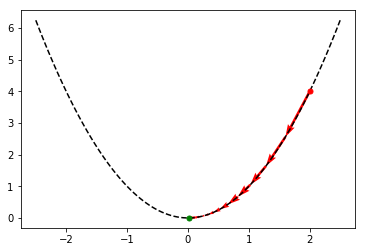

In [76]:
xs = gd.run(x0=2, lambda_=0.1, max_iter=20)
gd_x2.plot(xs, min_x=-2.5, max_x=2.5, save_to='x2.pdf')

We should be careful not to make $\lambda$ too small because it will take a lot longer to converge. In the example below, we set $\lambda=0.02$ and use the same number of steps as above.

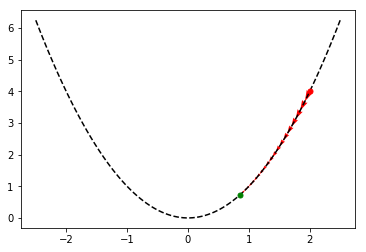

In [77]:
xs_slow = gd.run(x0=2, lambda_=0.02, max_iter=20)
gd_x2.plot(xs_slow, min_x=-2.5, max_x=2.5, save_to='x2_slow.pdf')

We should also be careful not to make $\lambda$ too large because gradient descent might not converge at all. Below we start from $x=0.5$ and use $\lambda = 1.1$. The first step overshoots the minimum $x=0$ and ends up at $x=-0.6$, where the gradient is even higher. This keeps on repeating and the steps keeps getting larger and larger.

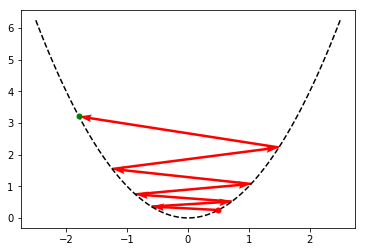

In [78]:
xs_overshoot = gd.run(x0=0.5, lambda_=1.1, max_iter=6)
gd_x2.plot(xs_overshoot, min_x=-2.5, max_x=2.5, save_to='x2_overshoot.pdf')

In order to make sure gradient descent is not diverging or converging too slowly, we can plot the value of the cost function $J$ as a function of the number of steps. If $J$ is decreasing too slowly, we can try increasing $\lambda$. If $J$ is increasing, we can try decreasing $J$. Note that With a sufficiently small value of $\lambda$, $J$ should decrease at *every* step.

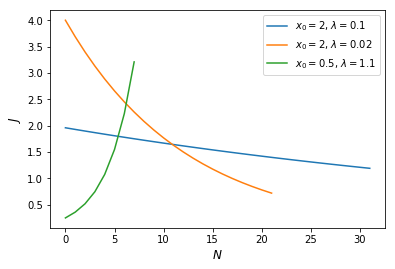

In [97]:
plt.plot(list(range(len(xs))), func(xs), label=r'$x_0=2$, $\lambda=0.1$')
plt.plot(list(range(len(xs_slow))), func(xs_slow), label=r'$x_0=2$, $\lambda=0.02$')
plt.plot(list(range(len(xs_overshoot))), func(xs_overshoot), label=r'$x_0=0.5$, $\lambda=1.1$')
plt.xlabel(r'$N$', fontsize=12)
plt.ylabel(r'$J$', fontsize=12)
plt.legend()
plt.savefig('x2_progress.pdf')

Let's now move to a more complicated function: $f(x) = \frac{12}{5} x^4 + \frac{4}{5} x^3 - \frac{18}{5} x^2 + 2$. This function has a global minimum at $x=-1$, and a local one at $x=+3/4$. Which one will gradient descent converge to? That depends on the starting point.

In [120]:
x4_func = lambda x: 12/5.*x**4 + 4/5.*x**3 - 18/5.*x**2 - 2
x4_func_grad = lambda x: 48/5.*x**3 + 12/5.*x**2 - 36/5.*x
gd_x4 = GradientDescent(x4_func, x4_func_grad)

Here we start at $x=+1.4$ and converge to the local minima.

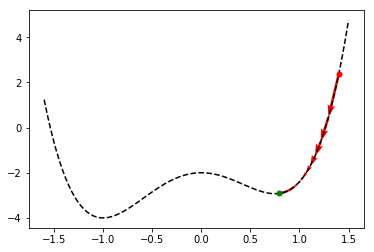

In [124]:
x4_local = gd_x4.run(x0=1.4, lambda_=0.005, max_iter=30)
gd_x4.plot(x4_local, min_x=-1.6, max_x=1.5, save_to='x4_local.pdf')

Below we start at $x=-1.5$ and converge to the global minima.

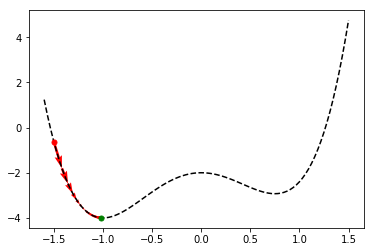

In [126]:
x4_global = gd_x4.run(x0=-1.5, lambda_=0.005, max_iter=30)
gd_x4.plot(x4_global, min_x=-1.6, max_x=1.5, save_to='x4_global.pdf')

Another interesting feature of $f(x)$ is that it has a local maxima at $x=0$. If we initialize gradient descent at $x=0$, it will not make any progress at all, since $f'(0)=0$. Even if we intialize close to the local maxima, progress will be very slow. This is because $f'(x)$ is small and gradient descent will take small steps. Below we keep the learning rate the same, start at $x=-0.01$ (so just to the left of the local maxima), and tripled the number of iterations. Even with many more steps, gradient descent is not close to the global minima. 

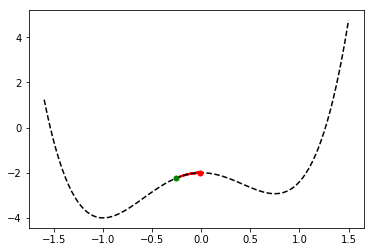

In [131]:
x4_slow = gd_x4.run(x0=-0.01, lambda_=0.005, max_iter=90)
gd_x4.plot(x4_slow, min_x=-1.6, max_x=1.5, save_to='x4_slow.pdf')

Plotting $J$ as a function of the number of iterations summarizes the importance of intialization:

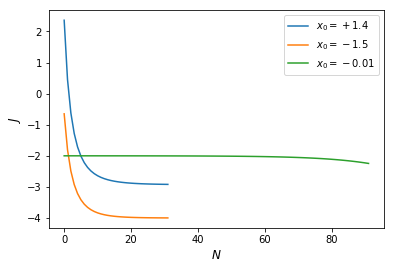

In [137]:
plt.plot(list(range(len(x4_local))), x4_func(x4_local), label=r'$x_0=+1.4$')
plt.plot(list(range(len(x4_global))), x4_func(x4_global), label=r'$x_0=-1.5$')
plt.plot(list(range(len(x4_slow))), x4_func(x4_slow), label=r'$x_0=-0.01$')
plt.xlabel(r'$N$', fontsize=12)
plt.ylabel(r'$J$', fontsize=12)
plt.legend()
plt.savefig('x4_progress.pdf')